Random Forest Classifier

USING THE FEATURES - COMMENTS, FILES_CHANGES, LINES_ADDED, LINES_REMOVED

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load data
data = pd.read_csv('data_csv.csv')  # replace 'your_data.csv' with your actual data path

# data
# data.size


In [2]:
# Check for missing values
data.isnull().sum()

# Encode the target variable
label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['label'])  # 0 for 'spam', 1 for 'not_spam'

# Select features and target
X = data[['comments', 'files_changed', 'lines_added', 'lines_removed']]
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [3]:
# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [4]:
# Predict on test data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
random_forest_accuracy = accuracy_score(y_test, y_pred)
random_forest_precision = precision_score(y_test, y_pred)
random_forest_recall = recall_score(y_test, y_pred)
random_forest_f1 = f1_score(y_test, y_pred)
random_forest_conf_matrix = confusion_matrix(y_test, y_pred)

# Print results
print("Accuracy:", random_forest_accuracy)
print("Precision:", random_forest_precision)
print("Recall:", random_forest_recall)
print("F1 Score:", random_forest_f1)
print("Confusion Matrix:\n", random_forest_conf_matrix)


Accuracy: 0.8879310344827587
Precision: 0.8823529411764706
Recall: 0.8653846153846154
F1 Score: 0.8737864077669902
Confusion Matrix:
 [[58  6]
 [ 7 45]]


USING LOGISTIC REGRESSION WITHOUT TITLE

In [5]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the Logistic Regression model
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

# Predict on test data
y_pred_logistic = logistic_model.predict(X_test)

# Calculate evaluation metrics
logistice_regression_accuracy = accuracy_score(y_test, y_pred_logistic)
logistice_regression_precision = precision_score(y_test, y_pred_logistic)
logistice_regression_recall = recall_score(y_test, y_pred_logistic)
logistice_regression_f1 = f1_score(y_test, y_pred_logistic)
logistice_regression_conf_matrix = confusion_matrix(y_test, y_pred_logistic)

# Print results
print("Logistic Regression Results:")
print("Accuracy:", logistice_regression_accuracy)
print("Precision:", logistice_regression_precision)
print("Recall:", logistice_regression_recall)
print("F1 Score:", logistice_regression_f1)
print("Confusion Matrix:\n", logistice_regression_conf_matrix)


Logistic Regression Results:
Accuracy: 0.896551724137931
Precision: 0.8703703703703703
Recall: 0.9038461538461539
F1 Score: 0.8867924528301887
Confusion Matrix:
 [[57  7]
 [ 5 47]]


USING THE FEATURES - TITLE, COMMENTS, FILES_CHANGES, LINES_ADDED, LINES_REMOVED

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd

# Load data
data = pd.read_csv('data_csv.csv')  # Replace with your actual file path

# data

In [7]:
# Encode the target variable
label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['label'])

In [8]:
# TF-IDF encoding for the 'title' feature
tfidf_vectorizer = TfidfVectorizer(max_features=100)  # Adjust max_features based on your data
tfidf_vectorizer
title_tfidf = tfidf_vectorizer.fit_transform(data['title']).toarray()
# title_tfidf


In [9]:
# Combine TF-IDF features with existing numerical features
numerical_features = data[['comments', 'files_changed', 'lines_added', 'lines_removed']]
X = pd.concat([pd.DataFrame(title_tfidf), numerical_features.reset_index(drop=True)], axis=1)
y = data['label']

In [10]:
# Convert all column names to strings
X.columns = X.columns.astype(str)

# Then split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# X_test


In [11]:
# Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# trying user input
X_test_custom = pd.DataFrame([[1, 10, 20, 5]])
X_test_custom = pd.concat([pd.DataFrame(tfidf_vectorizer.transform(['Readme update']).toarray()), X_test_custom], axis=1)
X_test_custom = scaler.transform(X_test_custom)
y_pred_custom = model.predict(X_test_custom)

# y_pred_custom.item()

d:\Git PR ML Project\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [12]:
# Calculate evaluation metrics
random_forest_with_TITLE_accuracy = accuracy_score(y_test, y_pred)
random_forest_with_TITLE_precision = precision_score(y_test, y_pred)
random_forest_with_TITLE_recall = recall_score(y_test, y_pred)
random_forest_with_TITLE_f1 = f1_score(y_test, y_pred)
random_forest_with_TITLE_conf_matrix = confusion_matrix(y_test, y_pred)

# Print results
print("Accuracy:", random_forest_with_TITLE_accuracy)
print("Precision:", random_forest_with_TITLE_precision)
print("Recall:", random_forest_with_TITLE_recall)
print("F1 Score:", random_forest_with_TITLE_f1)
print("Confusion Matrix:\n", random_forest_with_TITLE_conf_matrix)

Accuracy: 0.9655172413793104
Precision: 0.9285714285714286
Recall: 1.0
F1 Score: 0.9629629629629629
Confusion Matrix:
 [[60  4]
 [ 0 52]]


USING LOGISTIC REGRESSION WITH TITLE

In [13]:
from sklearn.linear_model import LogisticRegression


# Initialize and train the Logistic Regression model
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

# Predict on test data
y_pred_logistic = logistic_model.predict(X_test)

# Calculate evaluation metrics
logistice_regression_with_TITLE_accuracy = accuracy_score(y_test, y_pred_logistic)
logistice_regression_with_TITLE_precision = precision_score(y_test, y_pred_logistic)
logistice_regression_with_TITLE_recall = recall_score(y_test, y_pred_logistic)
logistice_regression_with_TITLE_f1 = f1_score(y_test, y_pred_logistic)
logistice_regression_with_TITLE_conf_matrix = confusion_matrix(y_test, y_pred_logistic)

# Print results
print("Logistic Regression Results:")
print("Accuracy:", logistice_regression_with_TITLE_accuracy)
print("Precision:", logistice_regression_with_TITLE_precision)
print("Recall:", logistice_regression_with_TITLE_recall)
print("F1 Score:", logistice_regression_with_TITLE_f1)
print("Confusion Matrix:\n", logistice_regression_with_TITLE_conf_matrix)

Logistic Regression Results:
Accuracy: 0.9482758620689655
Precision: 0.9423076923076923
Recall: 0.9423076923076923
F1 Score: 0.9423076923076923
Confusion Matrix:
 [[61  3]
 [ 3 49]]


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Step 1: Load the data
df = pd.read_csv("data_csv.csv")  # Replace 'data.csv' with your data file

# Separate features and target
X = df.drop("label", axis=1)
y = df["label"]

# Step 2: Handle categorical and text features
# TF-IDF vectorization for 'title' column
tfidf = TfidfVectorizer(max_features=100)  # adjust max_features based on vocabulary size

# Step 3: Column transformer to handle different types of preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ("title_tfidf", tfidf, "title"),  # Apply TF-IDF to the 'title' column
        ("num", StandardScaler(), ["comments", "files_changed", "lines_added", "lines_removed"])
    ],
    remainder="drop"  # drop columns that are not explicitly mentioned
)

# Step 4: Create a pipeline with preprocessing and the model
pipeline = make_pipeline(preprocessor, RandomForestClassifier(random_state=42))

# Step 5: Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train the model
pipeline.fit(X_train, y_train)

# Step 7: Make predictions
y_pred = pipeline.predict(X_test)

# Step 8: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label="spam")
recall = recall_score(y_test, y_pred, pos_label="spam")
f1 = f1_score(y_test, y_pred, pos_label="spam")
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.9655172413793104
Precision: 0.9444444444444444
Recall: 0.9807692307692307
F1 Score: 0.9622641509433962
Confusion Matrix:
 [[61  3]
 [ 1 51]]


KNN

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix, recall_score

# Load data
data = pd.read_csv("data_csv.csv")

# Step 1: Data Preprocessing

# Convert the label to binary values (spam=1, not spam=0)
label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['label'])

# Extract features and label
X_text = data['title']
X_numeric = data[['comments', 'files_changed', 'lines_added', 'lines_removed']]
y = data['label']

# Apply TF-IDF to the text feature
tfidf = TfidfVectorizer(max_features=100)  # Limit features to 100 for simplicity
X_text_tfidf = tfidf.fit_transform(X_text).toarray()

# Concatenate text and numeric features
X = pd.concat([pd.DataFrame(X_text_tfidf), X_numeric.reset_index(drop=True)], axis=1)

X.columns = X.columns.astype(str)

# Normalize the numeric features
scaler = StandardScaler()
X.iloc[:, -4:] = scaler.fit_transform(X.iloc[:, -4:])

# Step 2: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: KNN Classifier Training
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust 'n_neighbors' as needed
knn.fit(X_train, y_train)

# Step 4: Model Evaluation
y_pred = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred)
knn_precision = precision_score(y_test, y_pred)
knn_f1 = f1_score(y_test, y_pred)
knn_conf_matrix = confusion_matrix(y_test, y_pred)
knn_recall = recall_score(y_test, y_pred)

print(f"Accuracy: {knn_accuracy:.2f}")
print(f"Precision: {knn_precision:.2f}")
print(f"F1 Score: {knn_f1:.2f}")
print(f"Recall: {knn_recall:.2f}")
print("Confusion Matrix:\n", knn_conf_matrix)



C:\Users\hp\AppData\Local\Temp\ipykernel_28416\3013115674.py:33: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.82863856 -0.82863856 -0.08665082 -0.82863856 -0.45764469 -0.45764469
 -1.19963244 -0.45764469  2.13931242 -1.19963244 -0.08665082 -0.82863856
  0.28434305 -1.19963244  2.88130016 -0.82863856  0.65533693 -0.45764469
 -0.82863856 -0.45764469 -0.08665082 -1.19963244  1.39732467  0.28434305
  1.0263308  -0.08665082  0.65533693 -0.82863856 -1.19963244  2.13931242
 -0.82863856 -0.45764469  1.0263308  -0.45764469 -0.82863856  0.28434305
  0.65533693 -1.19963244  1.39732467  1.76831854 -0.08665082  1.0263308
 -0.82863856 -0.45764469 -0.08665082 -1.19963244  0.65533693  0.28434305
 -0.45764469 -0.08665082  0.65533693 -0.45764469 -0.82863856  1.39732467
  0.65533693 -0.45764469  0.28434305 -0.82863856  1.0263308  -0.45764469
 -1.19963244 -0.82863856  1.39732467 -0.08665082 -0.45764469 -1.19963244
 -0.82863856  0

Accuracy: 0.97
Precision: 0.93
F1 Score: 0.96
Recall: 1.00
Confusion Matrix:
 [[90  6]
 [ 0 78]]


Decission Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix, recall_score

# Assume the preprocessing steps (TF-IDF, label encoding, normalization) are done
# and we have X_train, X_test, y_train, y_test as before

# Step 1: Initialize and train the Decision Tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)  # You can also adjust hyperparameters like max_depth
decision_tree.fit(X_train, y_train)

# Step 2: Prediction and Evaluation
y_pred = decision_tree.predict(X_test)
decision_tree_accuracy = accuracy_score(y_test, y_pred)
decision_tree_precision = precision_score(y_test, y_pred)
decision_tree_f1 = f1_score(y_test, y_pred)
decision_tree_conf_matrix = confusion_matrix(y_test, y_pred)
decision_tree_recall = recall_score(y_test, y_pred)

print(f"Accuracy: {decision_tree_accuracy:.2f}")
print(f"Precision: {decision_tree_precision:.2f}")
print(f"F1 Score: {decision_tree_f1:.2f}")
print(f"Recall: {decision_tree_recall:.2f}")
print(f"Confusion Matrix:\n", decision_tree_conf_matrix)


Accuracy: 0.93
Precision: 0.89
F1 Score: 0.92
Recall: 0.95
Confusion Matrix:
 [[87  9]
 [ 4 74]]


Random Forest Results without 'title' feature:
Accuracy: 0.8879310344827587
Precision: 0.8823529411764706
Recall: 0.8653846153846154
F1 Score: 0.8737864077669902
Confusion Matrix:
 [[58  6]
 [ 7 45]]

Random Forest Results with 'title' feature:
Accuracy: 0.9655172413793104
Precision: 0.9285714285714286
Recall: 1.0
F1 Score: 0.9629629629629629
Confusion Matrix:
 [[60  4]
 [ 0 52]]

Logistic Regression Results without 'title' feature:
Logistic Regression Results:
Accuracy: 0.896551724137931
Precision: 0.8703703703703703
Recall: 0.9038461538461539
F1 Score: 0.8867924528301887
Confusion Matrix:
 [[57  7]
 [ 5 47]]

Logistic Regression Results with 'title' feature:
Logistic Regression Results:
Accuracy: 0.9482758620689655
Precision: 0.9423076923076923
Recall: 0.9423076923076923
F1 Score: 0.9423076923076923
Confusion Matrix:
 [[61  3]
 [ 3 49]]

KNN Results:
Accuracy: 0.9655172413793104
Precision: 0.9285714285714286
F1 Score: 0.9629629629629629
Recall: 1.0
Confusion Matrix:
 [[90  6]
 [ 0 78

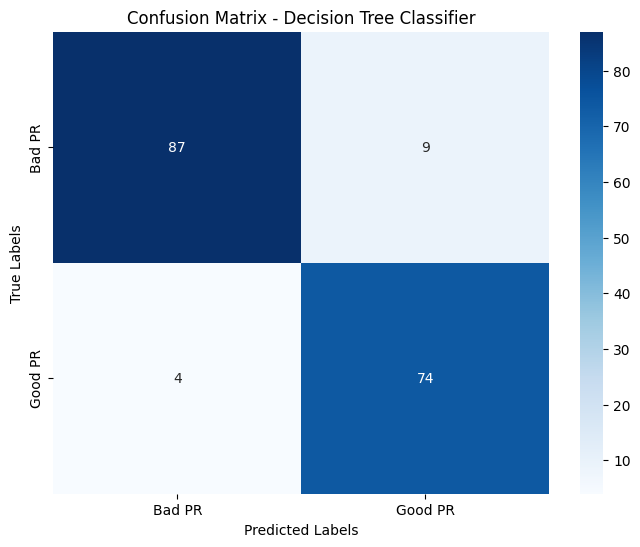

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

print("Random Forest Results without 'title' feature:")
print("Accuracy:", random_forest_accuracy)
print("Precision:", random_forest_precision)
print("Recall:", random_forest_recall)
print("F1 Score:", random_forest_f1)
print("Confusion Matrix:\n", random_forest_conf_matrix)

print("\nRandom Forest Results with 'title' feature:")
print("Accuracy:", random_forest_with_TITLE_accuracy)
print("Precision:", random_forest_with_TITLE_precision)
print("Recall:", random_forest_with_TITLE_recall)
print("F1 Score:", random_forest_with_TITLE_f1)
print("Confusion Matrix:\n", random_forest_with_TITLE_conf_matrix)

print("\nLogistic Regression Results without 'title' feature:")
print("Logistic Regression Results:")
print("Accuracy:", logistice_regression_accuracy)
print("Precision:", logistice_regression_precision)
print("Recall:", logistice_regression_recall)
print("F1 Score:", logistice_regression_f1)
print("Confusion Matrix:\n", logistice_regression_conf_matrix)

print("\nLogistic Regression Results with 'title' feature:")
print("Logistic Regression Results:")
print("Accuracy:", logistice_regression_with_TITLE_accuracy)
print("Precision:", logistice_regression_with_TITLE_precision)
print("Recall:", logistice_regression_with_TITLE_recall)
print("F1 Score:", logistice_regression_with_TITLE_f1)
print("Confusion Matrix:\n", logistice_regression_with_TITLE_conf_matrix)

print("\nKNN Results:")
print(f"Accuracy: {knn_accuracy}")
print(f"Precision: {knn_precision}")
print(f"F1 Score: {knn_f1}")
print(f"Recall: {knn_recall}")
print("Confusion Matrix:\n", knn_conf_matrix)

print("\nDecision Tree Results:")
print(f"Accuracy: {decision_tree_accuracy}")
print(f"Precision: {decision_tree_precision}")
print(f"F1 Score: {decision_tree_f1}")
print(f"Recall: {decision_tree_recall}")
print(f"Confusion Matrix:\n", decision_tree_conf_matrix)


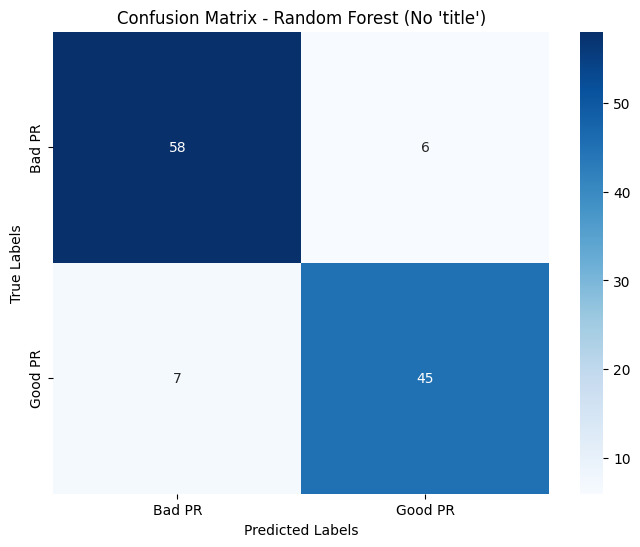

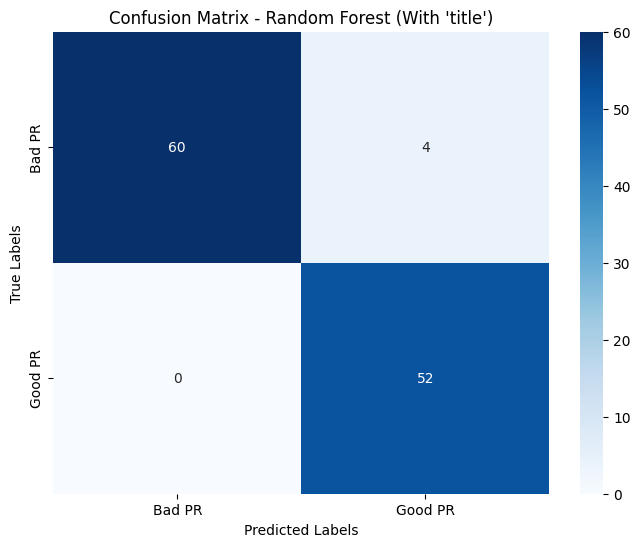

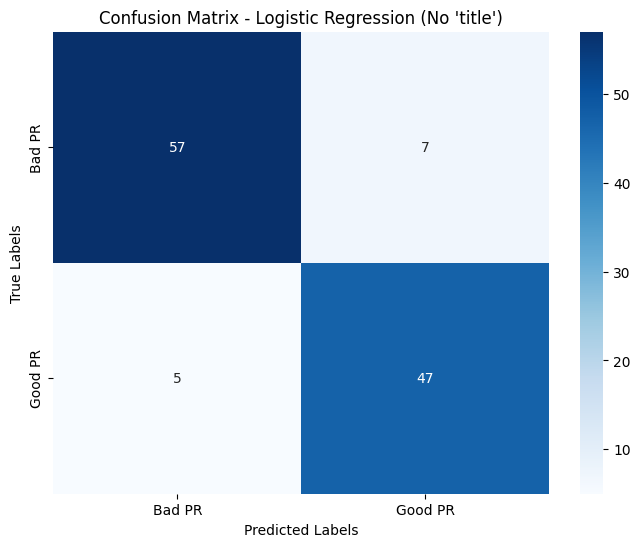

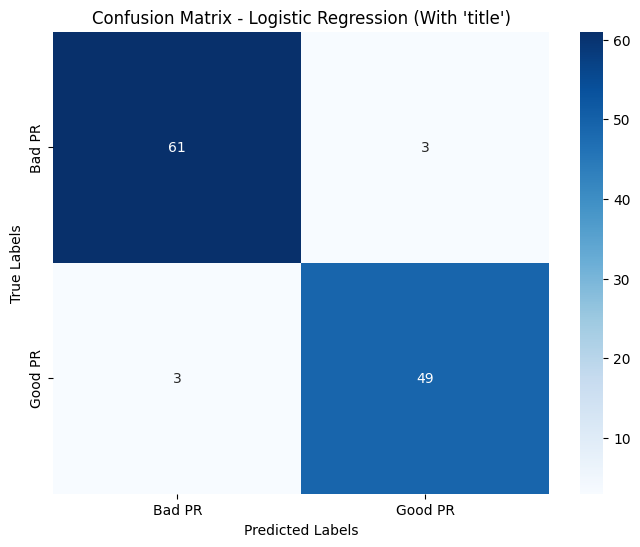

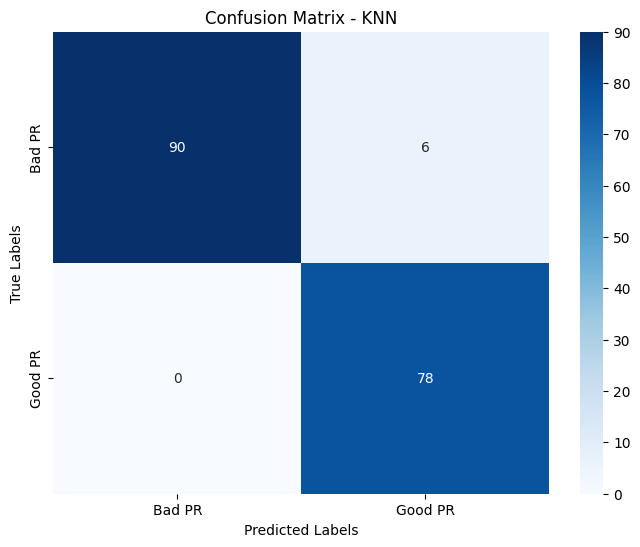

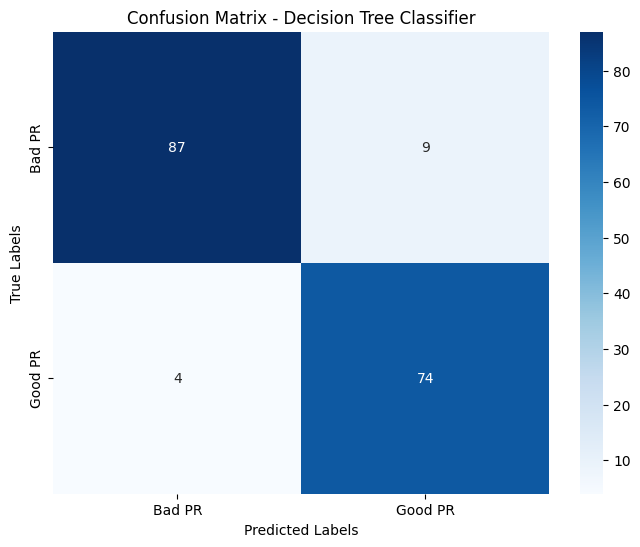

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define function to plot confusion matrix
def plot_confusion_matrix(conf_matrix, title, class_labels=["Bad PR", "Good PR"]):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(title)
    plt.show()

# Random Forest without 'title' feature
plot_confusion_matrix(random_forest_conf_matrix, "Confusion Matrix - Random Forest (No 'title')")

# Random Forest with 'title' feature
plot_confusion_matrix(random_forest_with_TITLE_conf_matrix, "Confusion Matrix - Random Forest (With 'title')")

# Logistic Regression without 'title' feature
plot_confusion_matrix(logistice_regression_conf_matrix, "Confusion Matrix - Logistic Regression (No 'title')")

# Logistic Regression with 'title' feature
plot_confusion_matrix(logistice_regression_with_TITLE_conf_matrix, "Confusion Matrix - Logistic Regression (With 'title')")

# K-Nearest Neighbors (KNN)
plot_confusion_matrix(knn_conf_matrix, "Confusion Matrix - KNN")

# Decision Tree
plot_confusion_matrix(decision_tree_conf_matrix, "Confusion Matrix - Decision Tree Classifier")


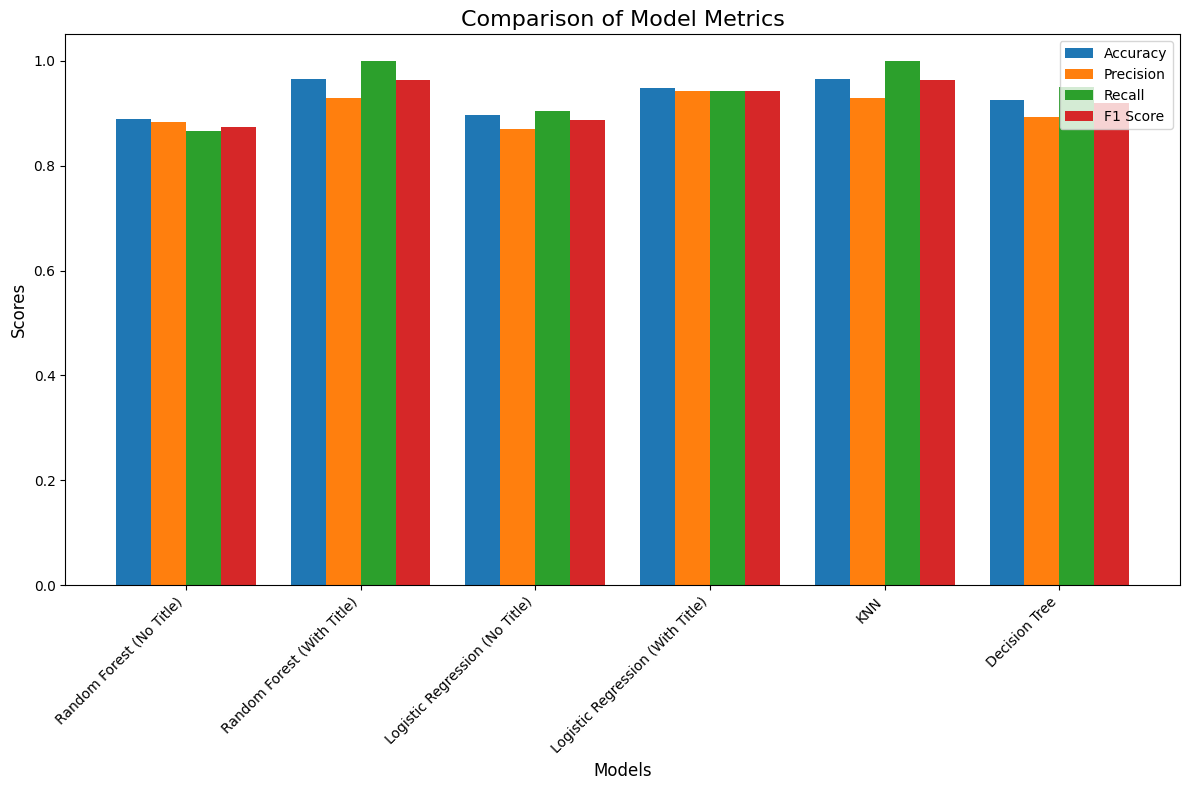

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Results
models = ['Random Forest (No Title)', 'Random Forest (With Title)',
          'Logistic Regression (No Title)', 'Logistic Regression (With Title)',
          'KNN', 'Decision Tree']

accuracies = [random_forest_accuracy, random_forest_with_TITLE_accuracy,
              logistice_regression_accuracy, logistice_regression_with_TITLE_accuracy,
              knn_accuracy, decision_tree_accuracy]

precisions = [random_forest_precision, random_forest_with_TITLE_precision,
              logistice_regression_precision, logistice_regression_with_TITLE_precision,
              knn_precision, decision_tree_precision]

recalls = [random_forest_recall, random_forest_with_TITLE_recall,
           logistice_regression_recall, logistice_regression_with_TITLE_recall,
           knn_recall, decision_tree_recall]

f1_scores = [random_forest_f1, random_forest_with_TITLE_f1,
             logistice_regression_f1, logistice_regression_with_TITLE_f1,
             knn_f1, decision_tree_f1]

# Create Bar Plots
x = np.arange(len(models))  # Position of bars on the x-axis
width = 0.2  # Bar width

fig, ax = plt.subplots(figsize=(12, 8))

# Plotting metrics
ax.bar(x - 1.5*width, accuracies, width, label='Accuracy')
ax.bar(x - 0.5*width, precisions, width, label='Precision')
ax.bar(x + 0.5*width, recalls, width, label='Recall')
ax.bar(x + 1.5*width, f1_scores, width, label='F1 Score')

# Add Labels, Title, and Legend
ax.set_xlabel('Models', fontsize=12)
ax.set_ylabel('Scores', fontsize=12)
ax.set_title('Comparison of Model Metrics', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right', fontsize=10)
ax.legend(fontsize=10)

# Show Plot
plt.tight_layout()
plt.show()
